In [56]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Lets load the data and analyse its shape.

In [57]:
df = pd.read_csv('creditcard.csv')

We also peek at few random samples from the data. There are lots of feature some of which may be irrelevant. We will try
to do feature selection later. 

In [58]:
df.shape

(284807, 31)

In [59]:
df.sample(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
143460,85373.0,-2.789,2.427,-0.289,-0.088,-0.711,2.734,-4.039,-6.605,-1.175,...,-3.501,1.984,0.331,-1.293,-0.356,0.452,-0.283,0.055,29.90,0
192400,129676.0,-0.669,1.050,1.140,2.557,0.589,0.545,1.527,0.117,-1.788,...,-0.288,-1.442,0.587,0.468,-0.703,-0.707,0.050,0.190,169.00,0
118647,75159.0,1.230,0.052,0.409,0.105,-0.543,-1.054,0.082,-0.293,0.016,...,-0.096,-0.281,0.022,0.479,0.240,0.896,-0.078,0.014,34.49,0
185015,126488.0,-1.055,0.062,-0.753,-1.119,0.453,-0.288,0.178,0.198,-1.028,...,0.021,0.744,0.072,0.052,-0.219,-0.053,0.140,0.239,48.50,0
4092,3739.0,1.282,-0.465,0.425,-0.478,-0.926,-0.905,-0.477,-0.263,0.071,...,0.158,0.511,-0.134,0.519,0.542,-0.191,-0.043,0.005,57.75,0
95371,65275.0,-0.336,0.874,1.270,0.561,-0.019,-0.764,1.039,-0.160,-0.569,...,0.131,0.273,-0.107,0.379,0.267,-0.370,0.018,0.030,62.24,0


We need to be sure that if there is any null value or not and if so how many. From the following result we can see that, there are
no null values in the dataset. 

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Lets see some summary statistics of the two features : time and amount. Around 80 hours of transaction is reported in
    this data with the mean amount around 88. 

In [61]:
pd.set_option('precision',3)
df.loc[:,['Time','Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


There are two picks in the time distribution. These represents the day times where most of the transactions occures.

<AxesSubplot:title={'center':'Distribution of the feature: Time'}, xlabel='Time', ylabel='Density'>

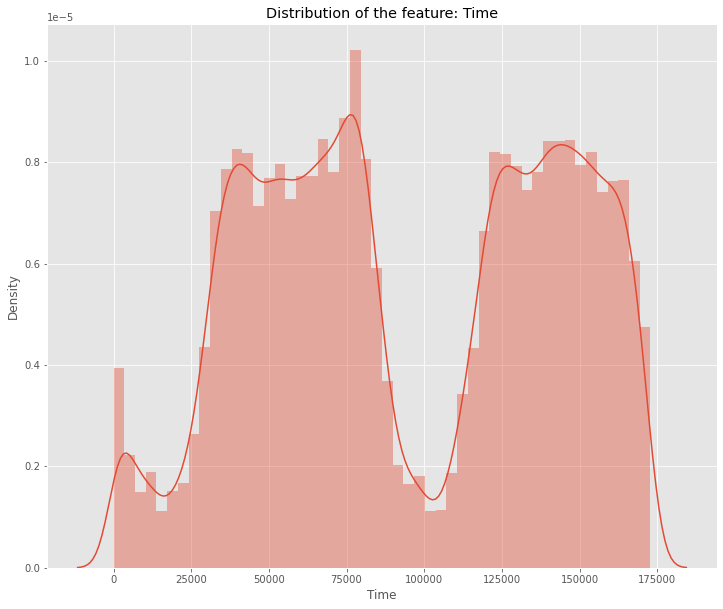

In [62]:
plt.figure(figsize=(12,10))
plt.title("Distribution of the feature: Time")
sns.distplot(df.Time)

From the amount distribution, we can see that it is right skewed. There are some transaction which is really high compared to 
most of the transactions.

<AxesSubplot:title={'center':'Distribution of the feature: Amount transactions'}, xlabel='Amount', ylabel='Density'>

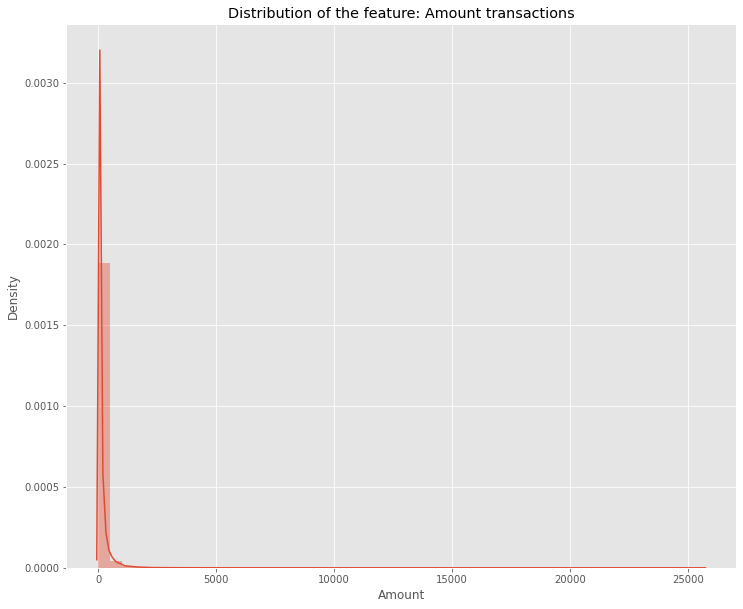

In [63]:
plt.figure(figsize=(12,10))
plt.title("Distribution of the feature: Amount transactions")
sns.distplot(df.Amount)

Now, if we compare the class distribution, we can see that most of the transactions are normal whereas only 0.173% are labeled as
fraudulent. We need to take care of this imbalanced class problem.

In [64]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))


There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

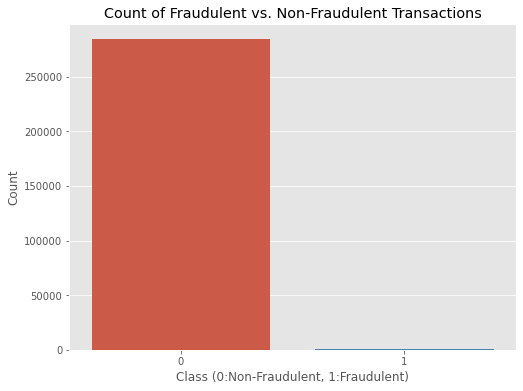

In [65]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index,y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [66]:
corr=df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


From the following correlation heatmap plot we can see that there are some sorts of multicollinearity in the features. 

Text(0.5, 1.0, 'Heatmap of the Correlation')

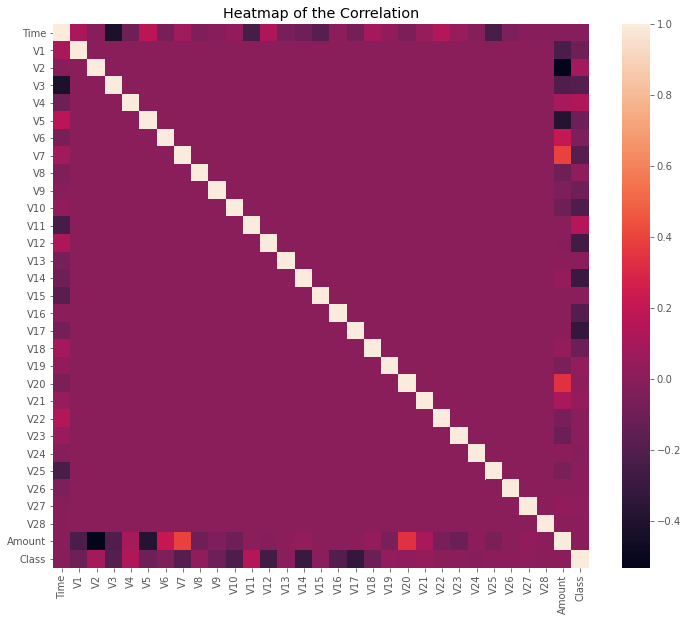

In [67]:
plt.figure(figsize=(12,10))
heat=sns.heatmap(data=corr)
plt.title('Heatmap of the Correlation')

In [68]:
skew_=df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

Since we will use some ML algorithms which involves weights or distance, for these we need to rescaled the time and amount features. We use standardization
as for the feature scalling.

In [69]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
scaler2=StandardScaler()
#scaling time
scaled_time=scaler1.fit_transform(df[['Time']])
flat_list1=[item for sublist in scaled_time.tolist() for item in sublist]
scaled_time=pd.Series(flat_list1)

In [70]:
#scalling the amount column
scaled_amount=scaler2.fit_transform(df[['Amount']])
flat_list2=[item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount=pd.Series(flat_list2)

In [71]:
df['scaled_time']=scaled_time
df['scale_amount']=scaled_amount
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_time,scale_amount
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0,-1.997,0.245
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0,-1.997,-0.342
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0,-1.997,1.161
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0,-1.997,0.141
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0,-1.997,-0.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,...,1.014,-0.509,1.437,0.250,0.944,0.824,0.77,0,1.642,-0.350
284803,172787.0,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,...,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.79,0,1.642,-0.254
284804,172788.0,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,...,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.88,0,1.642,-0.082
284805,172788.0,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,...,-0.163,0.123,-0.569,0.547,0.109,0.105,10.00,0,1.642,-0.313


In [72]:
#droping the old time and amount column
df.drop(['Amount','Time'],axis=1,inplace=True)

<h2>Random 90-10 splitting of the data</h2>
<p> we manually split the dataset into 90/10 by masking.

In [73]:
mask=np.random.rand(len(df))<0.9
train=df[mask]
test=df[~mask]
print("Thus, total training point is {} \ntotal testing point is {}".format(train.shape[0],test.shape[0]))

Thus, total training point is 256213 
total testing point is 28594


In [74]:

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

We will creating a subsample data set with balanced class distributions. We will use undersampling technique to deal with the imbalanced class.
The following codes are given for the undersampling. 



In [75]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 447 fraudulent transactions in the train data.


In [76]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [77]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scale_amount
53022,1.150,0.082,0.786,2.145,0.269,1.934,-0.779,0.570,-0.009,0.623,...,-0.203,-0.154,-1.714,0.418,0.076,0.051,0.005,0,-0.972,-0.329
32636,1.109,0.315,1.019,2.475,-0.406,0.140,-0.359,0.180,-0.320,0.653,...,0.435,-0.023,0.049,0.330,0.130,0.022,0.025,0,-1.186,-0.311
60153,1.163,-0.035,0.638,0.797,-0.481,-0.178,-0.193,0.051,0.555,-0.252,...,-0.598,0.102,0.099,0.255,0.210,-0.002,0.015,0,-0.896,-0.293
12074,1.224,0.600,-0.230,0.979,0.004,-1.179,0.142,-0.211,0.994,-0.772,...,-0.454,-0.043,0.362,0.459,0.303,-0.070,0.020,0,-1.497,-0.350
122469,1.060,-0.124,1.232,1.721,-0.634,0.626,-0.456,0.229,1.108,-0.449,...,-0.648,0.064,0.108,0.454,-0.514,0.095,0.033,0,-0.279,-0.269


In [78]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

This in this subsample, we have 50-50% distribution of class 0 and 1. 

In [79]:
subsample = pd.concat([selected, fraud])
len(subsample)

894

In [80]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scale_amount
0,-1.374,2.793,-4.347,2.401,-1.688,0.111,-0.922,-2.150,-2.027,-4.391,...,0.505,0.138,0.368,0.103,-0.414,0.455,0.097,1,1.527,1.042
1,-1.097,1.982,-2.282,-1.537,1.507,-0.045,0.758,0.781,-0.501,-0.362,...,0.702,0.056,3.498,-0.095,-0.058,0.340,0.298,0,0.405,-0.347
2,-2.488,4.359,-7.776,5.364,-1.824,-2.445,-4.964,1.485,-2.948,-7.175,...,1.021,-0.266,-0.371,0.366,0.081,0.185,-0.212,1,0.164,-0.349
3,-2.315,-1.549,2.434,-1.043,-1.158,-0.249,-1.147,0.864,-0.604,-0.412,...,0.846,0.006,0.592,0.543,-0.186,0.185,-0.129,0,-0.818,0.253
4,-0.940,0.748,-0.925,0.011,0.797,-1.576,0.543,-0.236,0.288,-0.516,...,0.946,-0.499,-0.065,-0.542,-0.232,-0.561,-0.262,0,0.744,-0.324
5,-4.599,2.763,-4.657,5.201,-2.470,-0.358,-3.767,0.061,-1.836,-1.471,...,0.261,0.621,0.994,-0.688,-0.338,-1.613,1.231,1,0.710,0.020
6,-1.401,-0.726,1.823,-1.125,0.207,1.219,0.263,0.526,0.379,-1.220,...,-0.465,0.153,-1.276,0.305,0.949,-0.090,0.050,0,-0.622,0.405
7,0.120,1.974,-0.434,5.391,1.290,0.281,0.222,0.068,-1.387,-0.045,...,0.205,-0.167,0.792,-0.224,0.473,-0.160,0.065,1,0.992,-0.350
8,-4.384,3.265,-3.077,3.404,-1.938,-1.221,-3.310,-1.112,-1.978,-3.288,...,-0.990,-0.330,0.158,0.006,-0.494,-1.538,-0.994,1,-0.758,-0.171
9,-0.377,0.477,-0.147,0.798,1.330,-0.865,0.781,-0.071,-0.029,-0.963,...,0.900,0.117,0.993,-0.737,-0.714,0.279,0.314,0,1.104,-0.193


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

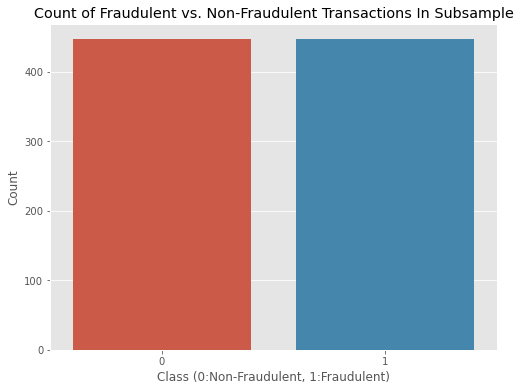

In [81]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

We will now explore the features that are <0.5 or <-0.5 with the Class. 

In [82]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.453
V2,0.494
V3,-0.568
V4,0.714
V5,-0.379
V6,-0.386
V7,-0.475
V8,0.053
V9,-0.559
V10,-0.619


In [83]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.568
V9,-0.559
V10,-0.619
V12,-0.686
V14,-0.746
V16,-0.607
V17,-0.568


In [84]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.714
V11,0.684
Class,1.000


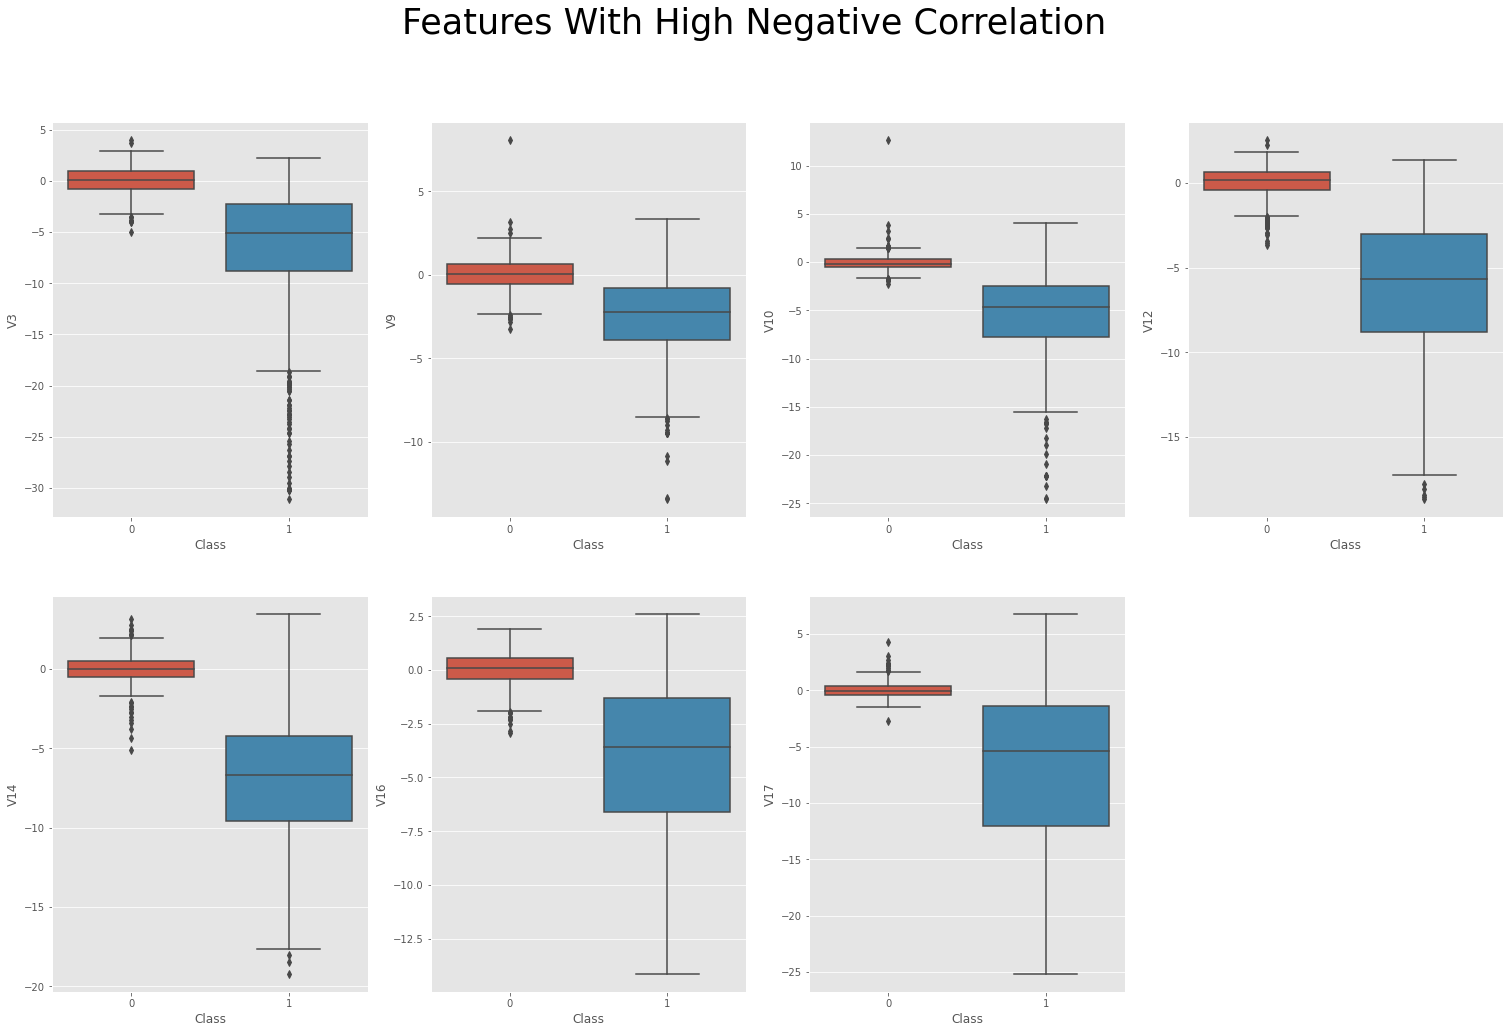

In [85]:

#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

<AxesSubplot:xlabel='Class', ylabel='V11'>

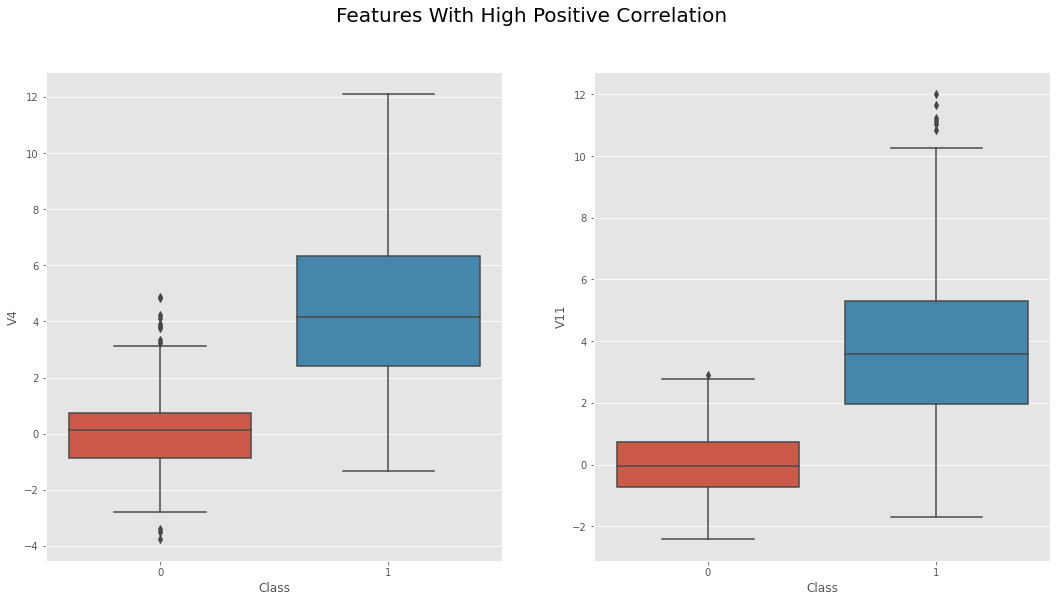

In [86]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

<h2>Extreme Outlier Removal</h2>
<p> From the boxplots, we can see that there are a lot of outliers. Normally we deal with outliers with the 1.5*InterQuartile range from Q1 and Q3 values. Since this is an imbalanced dataset, we will take 2.5*InterQuartile range value otherwise it will be too few dataset.

In [87]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [88]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))


We reduced our data size from 894 transactions by 261 transactions to 633 transactions.


We will do feature extraction with T-SNE algorithm. We will use two reduced
features instead of 31 for the better visualization. 

In [89]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [90]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

From the below plot, we can see that the scatter plot is showing good
visualization of the class data. The data are well seperated with few exceptions.

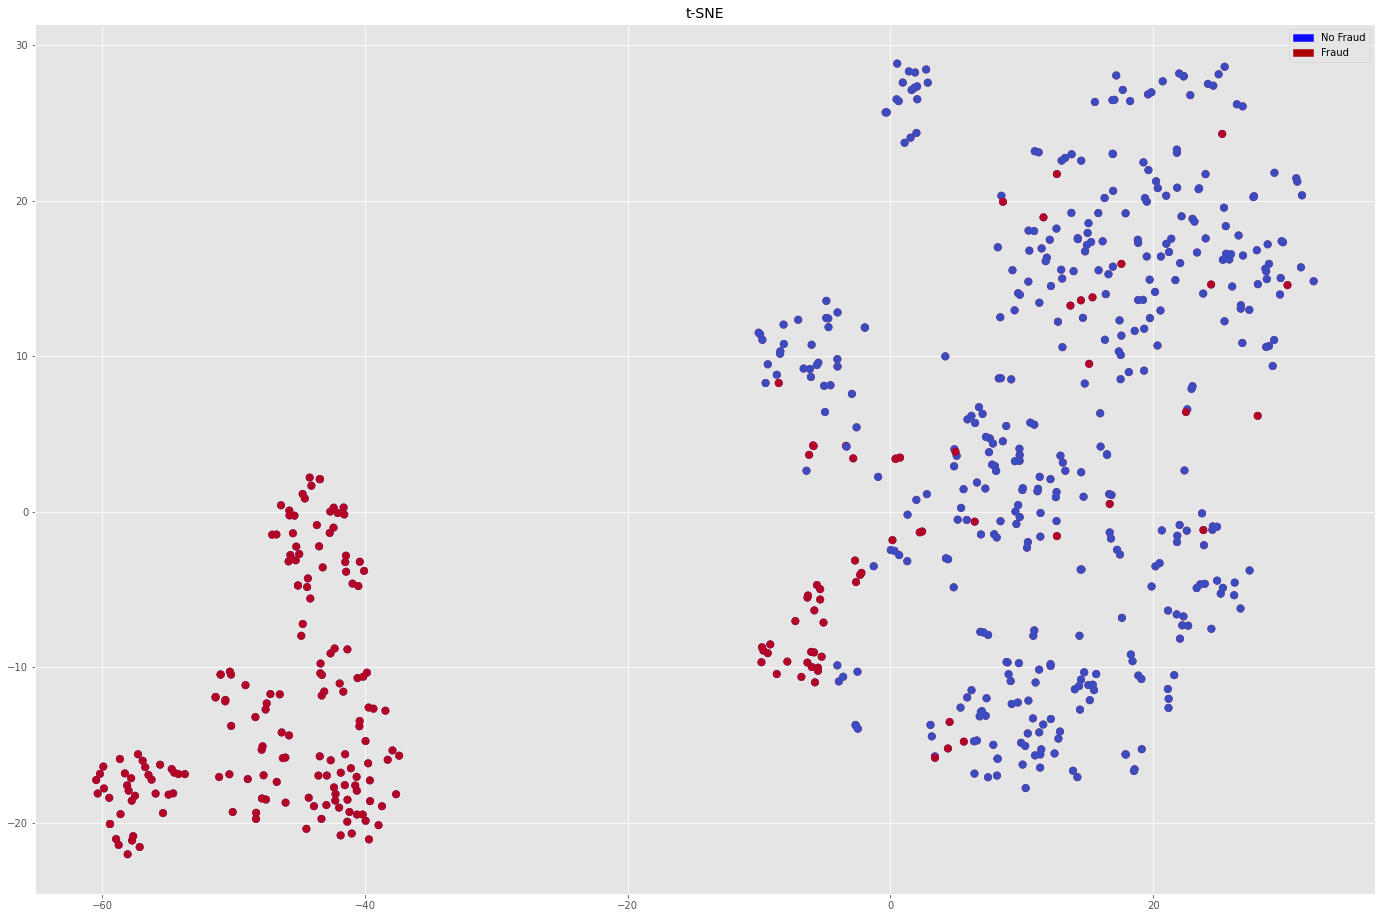

In [91]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [92]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# train test split: more precisely trains and validation data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [94]:

print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (506, 30) (127, 30) 

Y_shapes:
 Y_train: Y_validation:
 (506,) (127,)


In [95]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [103]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.965796 (0.028813)
LDA: 0.971914 (0.019821)
KNN: 0.959768 (0.026517)
CART: 0.893898 (0.027306)
SVM: 0.968178 (0.025085)
XGB: 0.964840 (0.026600)
RF: 0.966540 (0.021505)


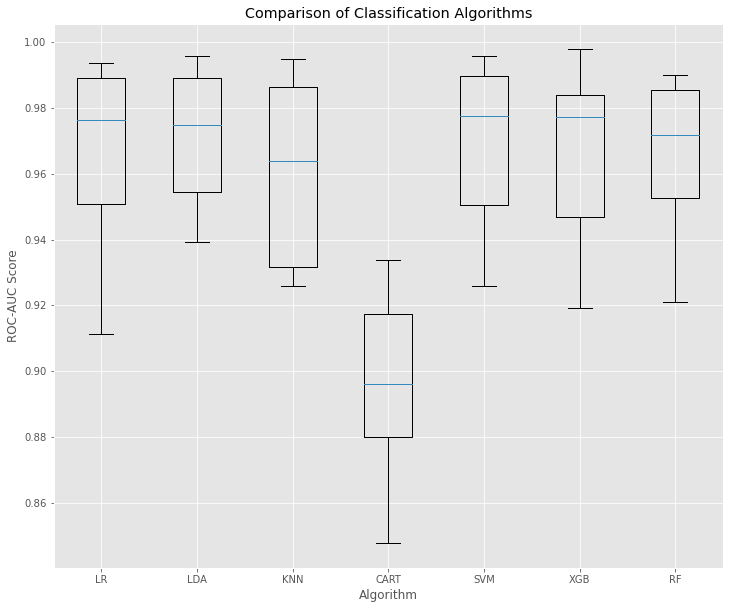

In [104]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [105]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('somefile.png')



If we want to see how a random tree in our random forest splits its node, we can look at the following tree. 

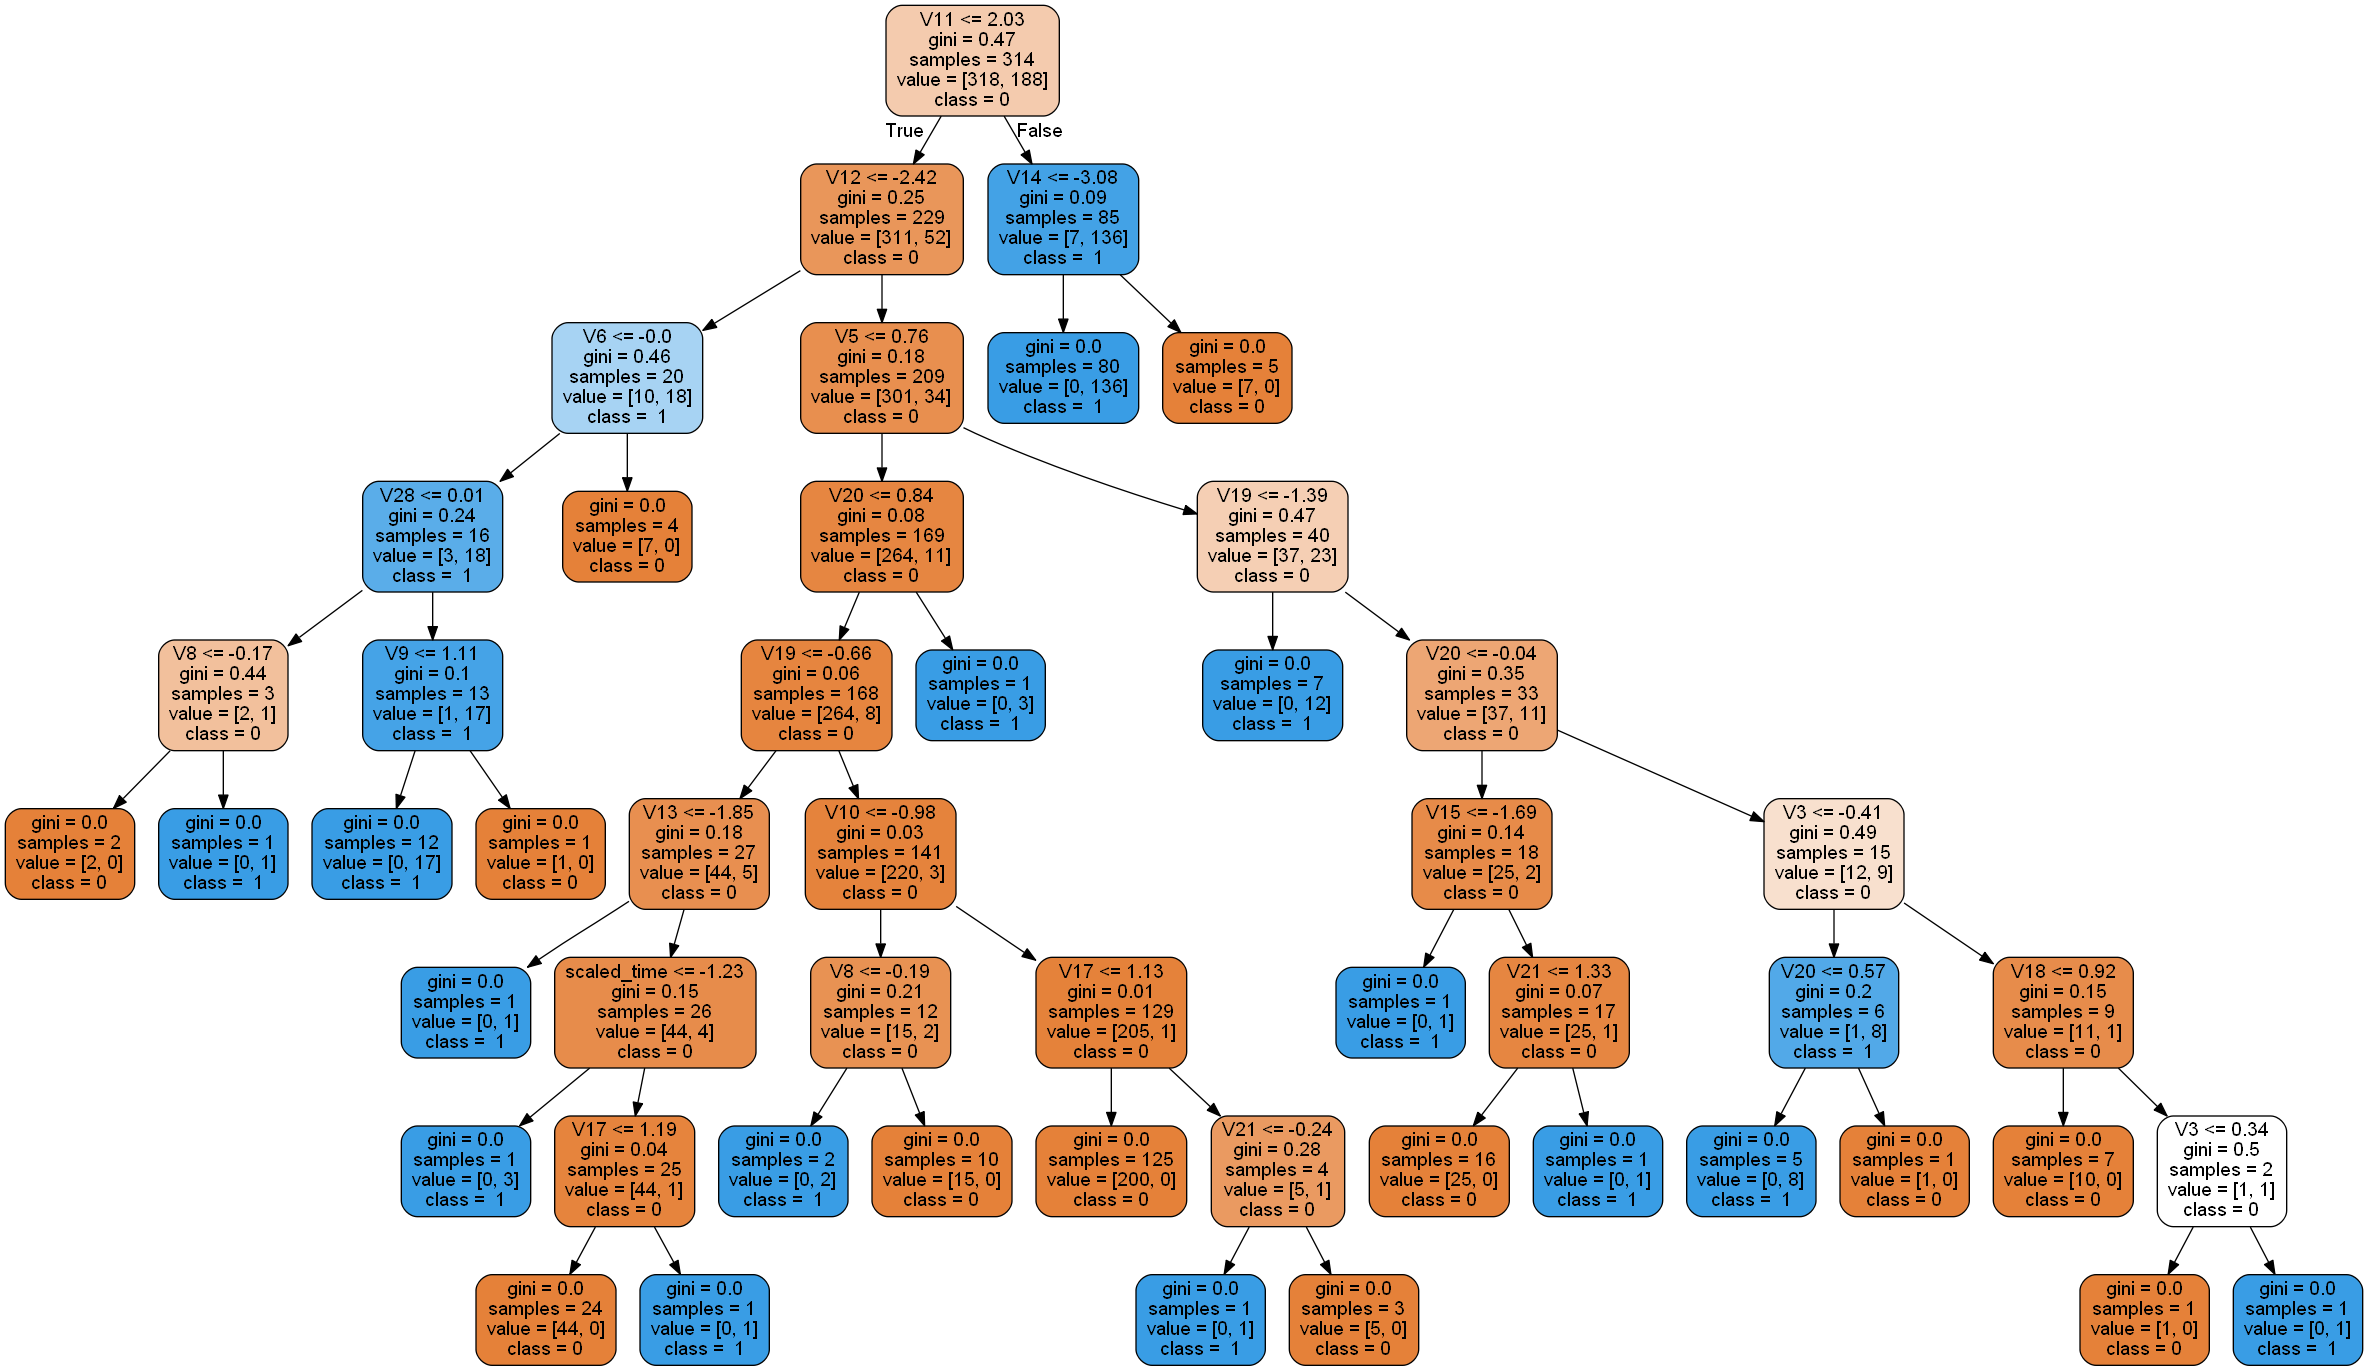

In [111]:
from IPython.display import Image, display
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)
view_pydot(graph)